# MLOps Exercise: Medical Image Classification with Chest X-Ray Images

## Introduction

In this exercise, you'll gain practical experience with MLOps (Machine Learning Operations) by working on a real-world problem: classifying chest X-ray images to diagnose pneumonia. You'll go through various stages, from data cleaning to deployment, learning how to manage an end-to-end machine learning pipeline.

### Prerequisites

- Basic understanding of Python
- Familiarity with machine learning concepts
- Experience with Jupyter Notebooks

### Tools and Libraries

- Python
- NumPy
- OpenCV
- TensorFlow/Keras
- scikit-learn
- Flask
- Matplotlib
- imbalanced-learn

These libraries should cover most requirements for this exercise, including data manipulation (NumPy, pandas), visualization (Matplotlib), machine learning (scikit-learn, TensorFlow), image processing (OpenCV), and class imbalance treatment (imbalanced-learn).

### Table of Contents

1. [Data Loading and Cleaning](#Data-Loading-and-Cleaning)
2. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
3. [Class Imbalance](#Class-Imbalance)
4. [Model Building](#Model-Building)
5. [Data Augmentation](#Data-Augmentation)
6. [Model Evaluation](#Model-Evaluation)
7. [Model Deployment (Bonus)](#Model-Deployment-(Bonus))


## Environment Setup

Before we begin, let's set up the environment. We'll install the necessary Python packages for this exercise.

```bash
pip install numpy pandas opencv-python matplotlib scikit-learn tensorflow flask
```

You can also create a `requirements.txt` file with the above packages and install them using `pip install -r requirements.txt`.
Be aware that you should download ipykernel and export your env to the jupyter notebook.
```bash
python -m ipykernel install --user --name=my_new_env
```

In [3]:
pip install numpy pandas opencv-python matplotlib scikit-learn tensorflow flask

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/f2/8c/35364a11b3e25f8e29a35420b0d18f65ec4f9d6d38e86a62d16ef998923c/pandas-2.1.1-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/01/50/0d8d8f044e2a0d8151e9ed59fe50924e9e697ba43a8b12d5ff9b45adb871/matplotlib-3.8.0-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/1b/7c/66d34dc231a309cc3a7f3eeb848319be3b616fd2918db302aaef727eff4a/scikit_learn-1.3.1-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/27/7e/9699c0ebd2bf124df8446bc4767390c023f7bb2d072b7f

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import sys
# Afficher le chemin de l'interpréteur Python actif
print(sys.executable)

C:\Users\fayed\anaconda3\envs\Tp1\python.exe


## Data Loading and Cleaning

### Objective

Load the dataset and clean it by removing corrupted images.

### Guidance

1. Download the Chest X-Ray Images (Pneumonia) dataset and place it in a directory accessible by this notebook. From https://ametice.univ-amu.fr
2. Unzip the dataset and explore its directory structure.
3. Load the images and labels for training.
4. Write a function to scan for and remove any corrupted or invalid images.

### Exercise

Now, load the dataset use the zipfile library and clean it by removing corrupted images. Write your code in the cell below.

```python
import zipfile

zip_file_path = 'path/to/your/zip/file.zip'
extract_path = 'path/to/extract/folder'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
```

After extracting, your dataset should have the following folder structure:

```
/
|-- test/
|   |-- NORMAL/
|   |-- PNEUMONIA/
|-- train/
|   |-- NORMAL/
|   |-- PNEUMONIA/
|-- val/
    |-- NORMAL/
    |-- PNEUMONIA/
```

You can point `train_path` and `test_path` to the `train` and `test` folders inside this extracted directory

In [4]:
#Data Loading and Cleaning

import zipfile

zip_file_path = 'Dataset (1).zip'
extract_path = 'C:\\Users\\fayed\\Downloads\\data'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
    
    



In [23]:
IMG_SIZE = 224
BATCH = 32
SEED = 42

In [32]:
pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.6 kB 330.3 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/294.6 kB 281.8 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.6 kB 363.1 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/294.6 kB 357.2 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/294.6 kB 357.2 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.6 kB 308.0 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.6 kB 344.8 kB/s eta 0:00:01
   -------------- --------

In [3]:
import random
import numpy as np
import os
import glob
import cv2
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
main_path = "C:\\Users\\fayed\\Downloads\\Dataset (1)\\chest_xray"


train_path = os.path.join(main_path,"train")
test_path=os.path.join(main_path,"test")
val_path=os.path.join(main_path,"val")

train_normal = glob.glob(train_path+"/NORMAL/*.jpeg")
train_pneumonia = glob.glob(train_path+"/PNEUMONIA/*.jpeg")

test_normal = glob.glob(test_path+"/NORMAL/*.jpeg")
test_pneumonia = glob.glob(test_path+"/PNEUMONIA/*.jpeg")

val_normal=glob.glob(val_path+"/NORMAL/*.jpeg")
val_pneumonia=glob.glob(val_path+"/PNEUMONIA/*.jpeg")

In [5]:
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]

val_list=[x for x in val_normal]
val_list.extend([x for x in val_pneumonia])

df_val=pd.DataFrame(np.concatenate([['Normal']*len(val_normal) , ['Pneumonia']*len(val_pneumonia)]), columns = ['class'])
df_val['image'] = [x for x in val_list]

In [14]:
df_train

,class,image
0,Normal,C:\Users\fayed\Downloads\Dataset (1)\chest_xra...
1,Normal,C:\Users\fayed\Downloads\Dataset (1)\chest_xra...
2,Normal,C:\Users\fayed\Downloads\Dataset (1)\chest_xra...
3,Normal,C:\Users\fayed\Downloads\Dataset (1)\chest_xra...
4,Normal,C:\Users\fayed\Downloads\Dataset (1)\chest_xra...
...,...,...
2497,Pneumonia,C:\Users\fayed\Downloads\Dataset (1)\chest_xra...
2498,Pneumonia,C:\Users\fayed\Downloads\Dataset (1)\chest_xra...
2499,Pneumonia,C:\Users\fayed\Downloads\Dataset (1)\chest_xra...
2500,Pneumonia,C:\Users\fayed\Downloads\Dataset (1)\chest_xra...


In [15]:
df_test

,class,image
0,Normal,C:\Users\fayed\Downloads\Dataset (1)\chest_xra...
1,Normal,C:\Users\fayed\Downloads\Dataset (1)\chest_xra...
2,Normal,C:\Users\fayed\Downloads\Dataset (1)\chest_xra...
3,Normal,C:\Users\fayed\Downloads\Dataset (1)\chest_xra...
4,Normal,C:\Users\fayed\Downloads\Dataset (1)\chest_xra...
...,...,...
619,Pneumonia,C:\Users\fayed\Downloads\Dataset (1)\chest_xra...
620,Pneumonia,C:\Users\fayed\Downloads\Dataset (1)\chest_xra...
621,Pneumonia,C:\Users\fayed\Downloads\Dataset (1)\chest_xra...
622,Pneumonia,C:\Users\fayed\Downloads\Dataset (1)\chest_xra...


,class,image
0,Normal,C:\Users\fayed\Downloads\Dataset (1)\chest_xra...
1,Normal,C:\Users\fayed\Downloads\Dataset (1)\chest_xra...
2,Normal,C:\Users\fayed\Downloads\Dataset (1)\chest_xra...
3,Normal,C:\Users\fayed\Downloads\Dataset (1)\chest_xra...
4,Normal,C:\Users\fayed\Downloads\Dataset (1)\chest_xra...
5,Normal,C:\Users\fayed\Downloads\Dataset (1)\chest_xra...
6,Normal,C:\Users\fayed\Downloads\Dataset (1)\chest_xra...
7,Normal,C:\Users\fayed\Downloads\Dataset (1)\chest_xra...
8,Pneumonia,C:\Users\fayed\Downloads\Dataset (1)\chest_xra...
9,Pneumonia,C:\Users\fayed\Downloads\Dataset (1)\chest_xra...


Train Set - Normal


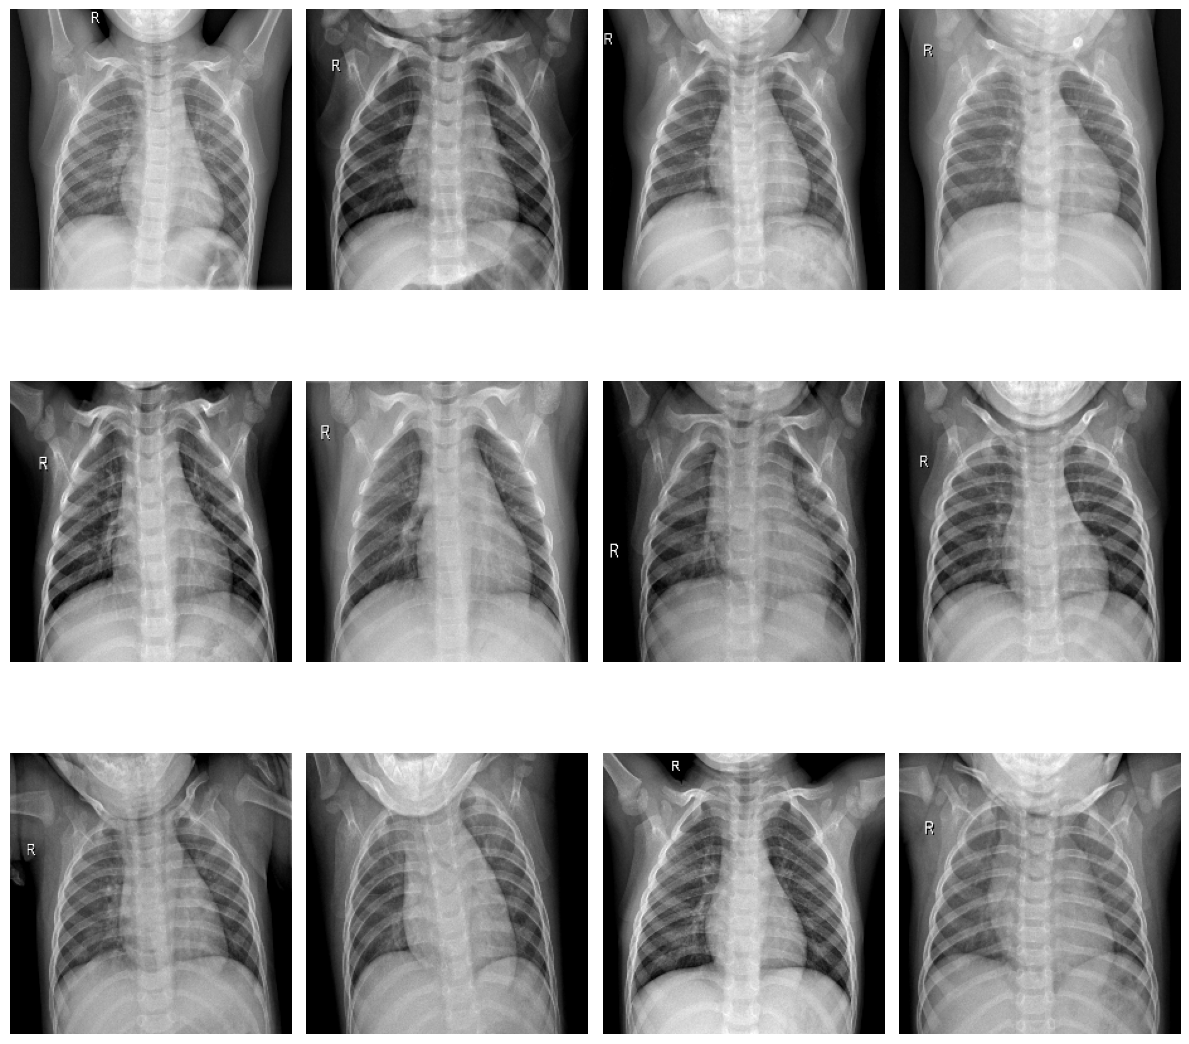

In [24]:
print('Train Set - Normal')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Train Set - pneumonia


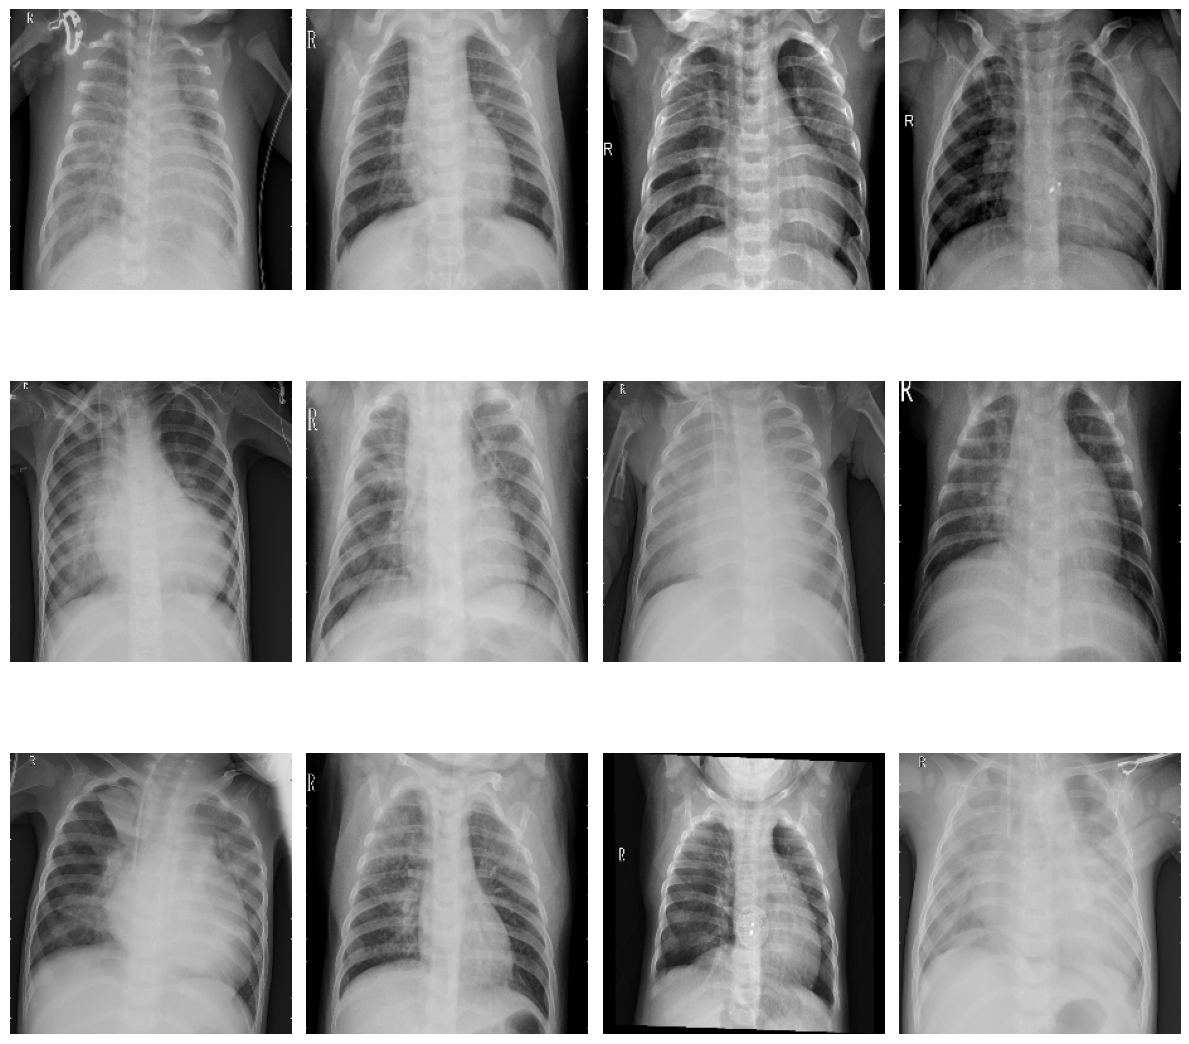

In [26]:
print('Train Set - pneumonia')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

# DATA EXPLORATION

C:\Users\fayed\AppData\Local\Temp\ipykernel_18388\214790654.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='class', data=df_train, palette="mako")


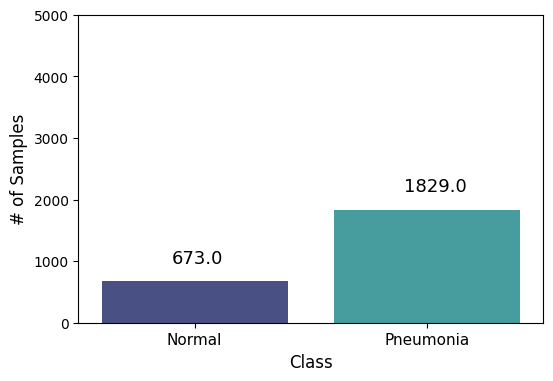

In [34]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_train, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,5000)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 13)
    
plt.show()

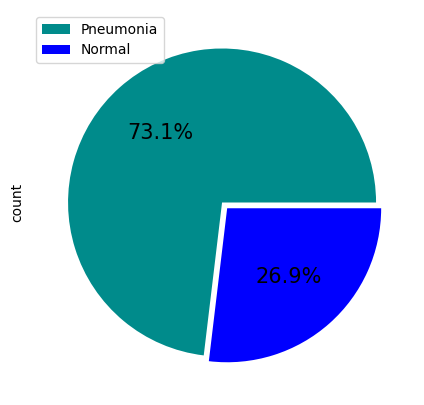

In [35]:
plt.figure(figsize=(7,5))

df_train['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['darkcyan','blue'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

C:\Users\fayed\AppData\Local\Temp\ipykernel_18388\961540807.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='class', data=df_test, palette="mako")


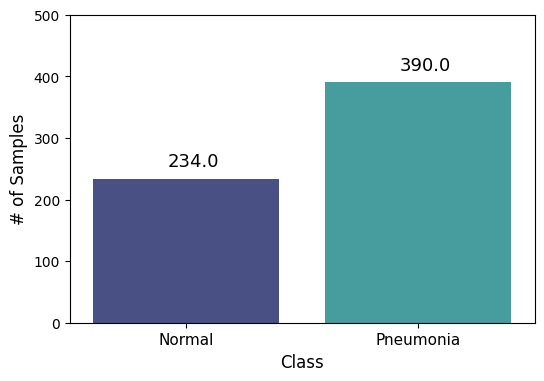

In [36]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_test, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,500)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+20), fontsize = 13)
    
plt.show()

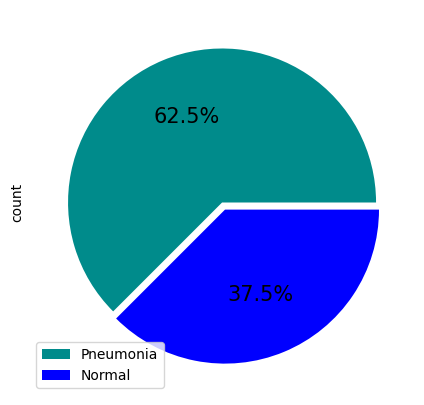

In [37]:
plt.figure(figsize=(7,5))

df_test['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['darkcyan','blue'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

The distributions from these datasets are a little different from each other. Both are slightly imbalanced, having more samples from the positive class (Pneumonia), with the training set being a little more imbalanced.



# imbalanced class

choosing SVM as model 

In [8]:
import PIL
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense)
from tensorflow.keras import backend as K

In [29]:
from sklearn import preprocessing

def preprocess_image(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    image = image / 255.0  
    return image

# Prétraitement des données d'entraînement, de test et de validation
X_train = np.array([preprocess_image(img_path) for img_path in df_train['image']])
X_test = np.array([preprocess_image(img_path) for img_path in df_test['image']])
X_val = np.array([preprocess_image(img_path) for img_path in df_val['image']])

# Étiquettes
y_train = df_train['class'].values
y_test = df_test['class'].values
y_val = df_val['class'].values


In [31]:
import cv2
import numpy as np
from sklearn import preprocessing

# prétraitement des images en niveaux de gris
def preprocess_image(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, target_size)
    image = image / 255.0  
    return image

# Prétraitement des données d'entraînement, de test et de validation
X_train = np.array([preprocess_image(img_path) for img_path in df_train['image']])
X_test = np.array([preprocess_image(img_path) for img_path in df_test['image']])
X_val = np.array([preprocess_image(img_path) for img_path in df_val['image']])

# Étiquettes
y_train = df_train['class'].values
y_test = df_test['class'].values
y_val = df_val['class'].values


In [32]:
from sklearn.svm import SVC

# Création du modèle SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Entraînement du modèle sur les données d'entraînement
svm_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

SVC(kernel='linear', random_state=42)

In [33]:
from sklearn.metrics import accuracy_score, classification_report

# Prédictions sur les données de test
y_pred = svm_model.predict(X_test.reshape(X_test.shape[0], -1))

# Évaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.7516025641025641
Classification Report:
              precision    recall  f1-score   support

      Normal       0.95      0.35      0.52       234
   Pneumonia       0.72      0.99      0.83       390

    accuracy                           0.75       624
   macro avg       0.84      0.67      0.67       624
weighted avg       0.81      0.75      0.71       624



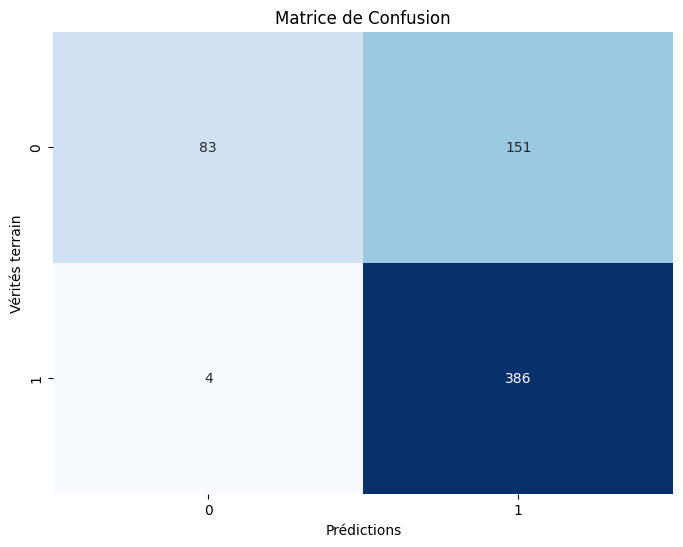

Rapport de classification :
              precision    recall  f1-score   support

      Normal       0.95      0.35      0.52       234
   Pneumonia       0.72      0.99      0.83       390

    accuracy                           0.75       624
   macro avg       0.84      0.67      0.67       624
weighted avg       0.81      0.75      0.71       624



In [34]:
# Affichage de la matrice de confusion
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Vérités terrain')
plt.title('Matrice de Confusion')
plt.show()

# Affichage du rapport de classification
report = classification_report(y_test, y_pred)
print('Rapport de classification :')
print(report)

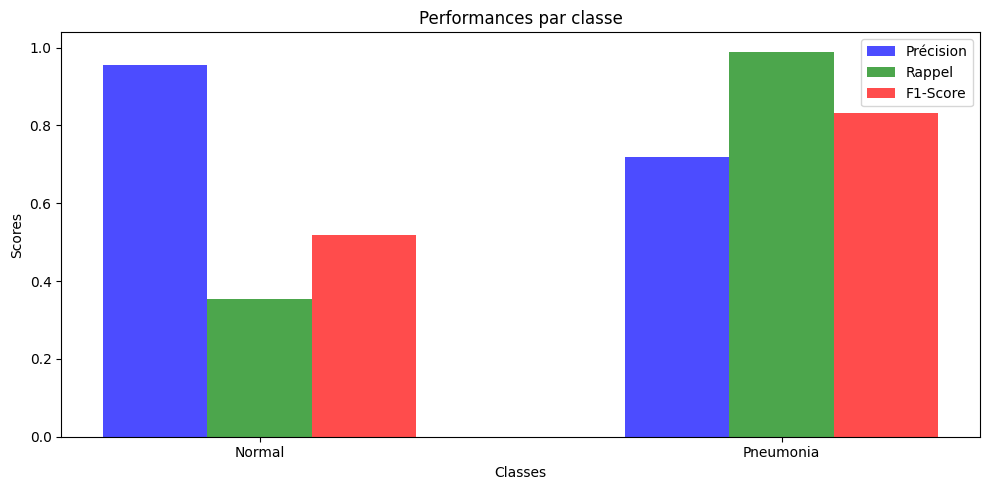

In [35]:
# Affichage du rapport de classification sous forme de graphique

report = classification_report(y_test, y_pred, output_dict=True)
precision = [report['Normal']['precision'], report['Pneumonia']['precision']]
recall = [report['Normal']['recall'], report['Pneumonia']['recall']]
f1_score = [report['Normal']['f1-score'], report['Pneumonia']['f1-score']]
labels = ['Normal', 'Pneumonia']

# Création d'un graphique à barres pour la précision, le rappel et la F1-score
plt.figure(figsize=(10, 5))
bar_width = 0.2
index = np.arange(len(labels))

plt.bar(index, precision, bar_width, label='Précision', color='b', alpha=0.7)
plt.bar(index + bar_width, recall, bar_width, label='Rappel', color='g', alpha=0.7)
plt.bar(index + 2 * bar_width, f1_score, bar_width, label='F1-Score', color='r', alpha=0.7)

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Performances par classe')
plt.xticks(index + bar_width, labels)
plt.legend()
plt.tight_layout()
plt.show()

## Model Building

### Objective

Build and train a deep learning model for image classification.

### Guidance

1. Use a Convolutional Neural Network (CNN) for this task.
2. Experiment with different architectures and hyperparameters.

### Exercise

Build and train your model. Write your code in the cell below.


In [37]:
from sklearn.preprocessing import LabelEncoder

# Créez un objet LabelEncoder
label_encoder = LabelEncoder()

# Encodez les étiquettes d'entraînement, de test et de validation en format numérique
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_val_encoded = label_encoder.transform(y_val)

In [39]:

import tensorflow as tf
from tensorflow.keras import layers, models

# Création du modèle CNN
model = models.Sequential()

# Couche de convolution 2D
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Autres couches de convolution et de pooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Couches fully connected (Dense)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Couche de sortie pour la classification binaire

# Compilation du modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Résumé du modèle
model.summary()

# Entraînement du modèle
history = model.fit(X_train, y_train_encoded, epochs=10, validation_data=(X_val, y_val_encoded))

# Évaluation du modèle sur les données de test
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print(f'Accuracy on test data: {test_acc}')


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 26, 26, 128)      

## Data Augmentation

### Objective

Improve your model's performance by using data augmentation techniques.

### Guidance

1. Apply data augmentation techniques like rotation, flipping, and zooming to generate more training data.
2. Retrain your model using the augmented dataset.

### Exercise

Apply data augmentation techniques and evaluate the impact on the model. Write your code in the cell below.


In [20]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Création d'un générateur de données pour l'augmentation de la classe "Normal"
datagen = ImageDataGenerator(
    rotation_range=20,  # Rotation jusqu'à 20 degrés
    width_shift_range=0.1,  # Décalage horizontal jusqu'à 10% de la largeur
    height_shift_range=0.1,  # Décalage vertical jusqu'à 10% de la hauteur
    shear_range=0.2,  # Transformation de cisaillement avec un angle maximal de 20 degrés
    zoom_range=0.2,  # Zoom avant ou arrière jusqu'à 20%
    horizontal_flip=True,  # Retournement horizontal
    fill_mode='nearest'  # Mode de remplissage pour les pixels en dehors des limites
)

# Création d'une liste pour stocker les nouvelles images augmentées et leurs étiquettes
augmented_images = []
augmented_labels = []

# Définir le nombre d'augmentations par exemple d'origine
num_augmentations = 4  # Vous pouvez ajuster ce nombre

# Appliquer l'augmentation de données à chaque image et étiquette
for image, label in zip(X_train, y_train):
    augmented_images.append(image)
    augmented_labels.append(label)
    
    if label == 'Normal':
        # Appliquer l'augmentation de données pour la classe "Normal"
        for _ in range(num_augmentations):
            augmented_image = datagen.random_transform(image)
            augmented_images.append(augmented_image)
            augmented_labels.append(label)

# Convertir les données augmentées en tableaux NumPy
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)



In [22]:
from sklearn.svm import SVC

# Création du modèle SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Entraînement du modèle sur les données augmentées
svm_model.fit(augmented_images.reshape(augmented_images.shape[0], -1), augmented_labels)


SVC(kernel='linear', random_state=42)

## Model Evaluation

### Objective

Evaluate your model's performance using different metrics and visualization tools.

### Guidance

1. Use metrics like accuracy, precision, recall, and F1-score for evaluation.
2. Plot confusion matrices and ROC curves to visualize your model's performance.

### Exercise

Evaluate your model and interpret the results. Write your code in the cell below.


# Evaluating SVM after data augmentation:

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prédictions sur les données de test
y_pred = svm_model.predict(X_test.reshape(X_test.shape[0], -1))

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Affichage de la matrice de confusion
confusion_mat = confusion_matrix(y_test, y_pred)
print('Matrice de Confusion:')
print(confusion_mat)

# Affichage du rapport de classification
report = classification_report(y_test, y_pred)
print('Rapport de Classification:')
print(report)

Accuracy: 0.7243589743589743
Matrice de Confusion:
[[ 93 141]
 [ 31 359]]
Rapport de Classification:
              precision    recall  f1-score   support

      Normal       0.75      0.40      0.52       234
   Pneumonia       0.72      0.92      0.81       390

    accuracy                           0.72       624
   macro avg       0.73      0.66      0.66       624
weighted avg       0.73      0.72      0.70       624



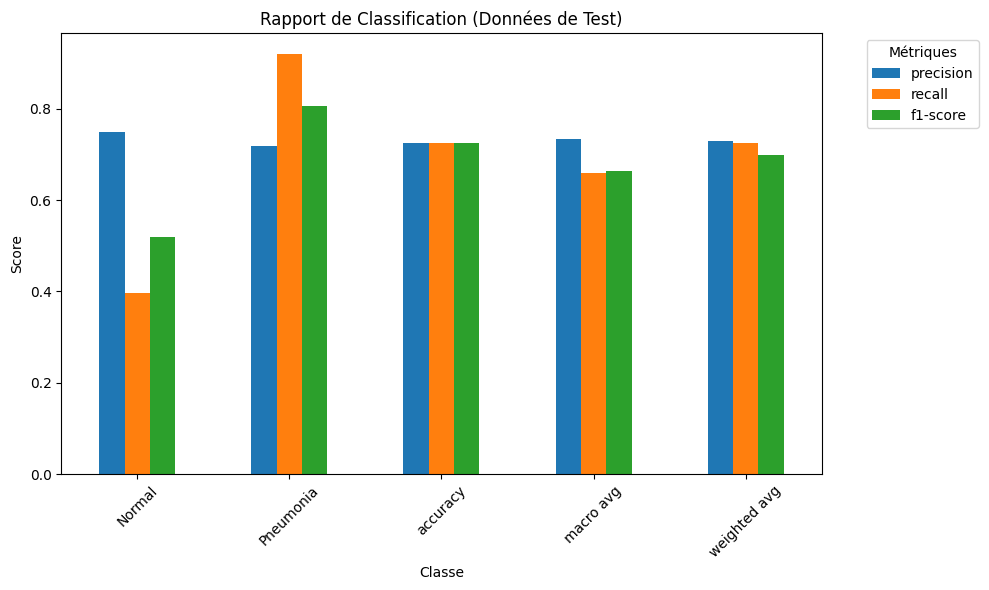

In [26]:
# Affichage du rapport de classification sous forme de graphique

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Prédictions sur les données de test
y_pred = svm_model.predict(X_test.reshape(X_test.shape[0], -1))

# Obtenir le rapport de classification
report = classification_report(y_test, y_pred, output_dict=True)

# Créer un DataFrame à partir du rapport de classification
import pandas as pd
report_df = pd.DataFrame(report).transpose()

# Supprimer la colonne avec le support (nombre d'échantillons par classe)
report_df.drop(columns='support', inplace=True)

# Convertir les valeurs en nombres flottants
report_df = report_df.apply(pd.to_numeric, errors='ignore')

# Affichage du rapport de classification sous forme de graphique
report_df.plot(kind='bar', figsize=(10, 6))
plt.title('Rapport de Classification (Données de Test)')
plt.ylabel('Score')
plt.xlabel('Classe')
plt.xticks(rotation=45)
plt.legend(title='Métriques', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Model Deployment (Bonus)

### Objective

Learn the basics of deploying a machine learning model.

### Guidance

1. Save your trained model.
2. Use Flask to create a simple REST API to serve your model.

### Exercise

Deploy your model using Flask. Write your code in the cell below.


In [40]:
model.save("my_model.h5")

C:\Users\fayed\anaconda3\envs\Tp1\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
from flask import Flask, request, jsonify
from keras.models import load_model

app = Flask(__name__)

# Chargez le modèle entraîné
model = load_model("my_model.h5")

# Définissez une route pour effectuer des prédictions
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Obtenez les données d'image à partir de la requête POST
        image_data = request.files['image'].read()
        
        # Effectuez la prétraitement nécessaire sur l'image (par exemple, redimensionnement et mise à l'échelle)
        # Assurez-vous que le prétraitement correspond à ce que vous avez fait lors de l'entraînement
        
        # Faites la prédiction en utilisant le modèle chargé
        prediction = model.predict(image_data)
        
        # Convertissez les résultats en une réponse JSON
        result = {'prediction': prediction[0]}
        
        return jsonify(result)
    except Exception as e:
        return str(e)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\fayed\anaconda3\envs\Tp1\lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)



### Next Steps

1. Experiment with more advanced architectures and hyperparameters.
2. Deploy your model
3. Integrate your model into a web application or other services.
4. Learn more about MLOps best practices and tools.


